# convert pleco dump to spreadsheet

In [54]:
#import xml file
import xml.etree.ElementTree as ET
import csv
tree = ET.parse('./Report.xml')
root = tree.getroot()
card_data = []
for card in root.findall(".//card"):
    card_datum = {}
    card_datum["created_stamp"] = card.get("created")
    card_datum["modified_stamp"] = card.get("modified")
    
    entry = card.find("./entry")
    card_datum["traditional"] = entry.find("./headword[@charset='tc']").text

    if entry.find("./cantopron") is None:
        continue
    card_datum["jyutping"] = entry.find("./cantopron").text
    
    if card.find("scoreinfo") is None:
        continue
    card_datum["correct"] = int(card.find("scoreinfo").get("correct"))
    card_datum["incorrect"] = int(card.find("scoreinfo").get("incorrect"))
    card_datum["difficulty"] = int(card.find("scoreinfo").get("difficulty"))
    card_datum["priority"] = card.find("scoreinfo").get("priority")
    card_datum["last_reviewed_stamp"] = int(card.find("scoreinfo").get("lastreviewedtime"))
    card_data.append(card_datum)
    
    

    
    
#convert xml to csv
import pandas as pd
cards_frame = pd.DataFrame(card_data)
for stamp in ["last_reviewed_stamp","created_stamp","modified_stamp"]:
    cards_frame[stamp] = pd.to_datetime(cards_frame[stamp],unit='s')
    
cards_frame.sort_values("created_stamp", ascending=False,inplace=True)
cards_frame.to_csv('./Report.csv', index = False)


# View 30 Most Recently Added Vocabs

In [55]:
#30 most recently added
cards_frame.sort_values("created_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
926,2021-09-30 20:51:25,2021-09-30 20:52:30,名牌,ming4 paai4,0,1,90,None,2021-09-30 20:54:47
925,2021-09-30 20:50:38,2021-09-30 20:52:30,近排,gan6 paai2,0,1,90,None,2021-09-30 20:54:10
924,2021-09-30 20:50:25,2021-09-30 20:52:30,裝修,zong1 sau1,0,1,90,None,2021-09-30 20:55:07
923,2021-09-30 20:49:44,2021-09-30 20:52:30,入嚟,jap6 lai4,0,1,90,None,2021-10-01 17:12:47
922,2021-09-30 20:49:08,2021-09-30 20:52:30,平時,ping4 si4,0,1,90,None,2021-09-30 20:54:05
921,2021-09-29 21:08:20,2021-09-30 20:52:30,鋪頭,pou3 tau2,0,1,90,None,2021-09-30 20:54:59
920,2021-09-29 20:55:58,2021-09-30 20:52:30,努力,nou5 lik6,0,1,90,None,2021-10-01 17:12:56
919,2021-09-29 20:54:32,2021-09-30 20:52:30,包括,baau1 kut3,0,1,90,None,2021-10-01 17:11:31
918,2021-09-29 20:51:29,2021-09-30 20:52:30,喜好,hei2 hou3,0,1,90,None,2021-10-01 17:11:26
917,2021-09-29 20:51:11,2021-09-30 20:52:30,鬧,naau6,1,0,96,None,2021-09-30 20:54:17


# View 30 Most Recently Reviewed Vocabs

In [56]:
#30 most recently reviewed
cards_frame.sort_values("last_reviewed_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
629,2020-12-24 03:51:56,2021-07-23 16:14:07,嘈喧巴閉,cou4 hyun1 baa1 bai3,4,10,50,high,2021-10-01 17:20:17
497,2020-09-30 16:18:40,2021-07-23 16:14:07,筷子,faai3 zi2,2,6,70,high,2021-10-01 17:19:16
608,2020-12-09 17:27:40,2021-07-23 16:14:07,好耐冇見,hou2 noi6 mou5 gin3,6,14,50,high,2021-10-01 17:19:12
512,2020-10-27 22:33:19,2021-08-01 13:05:36,幫,bong1,2,2,90,high,2021-10-01 17:18:44
307,2020-05-22 20:03:44,2021-07-23 16:14:07,煮餸,zyu2 sung3,6,31,50,high,2021-10-01 17:18:40
660,2021-01-20 17:00:06,2021-08-01 12:23:13,揀,gaan2,4,5,70,high,2021-10-01 17:18:36
882,2021-09-01 19:15:18,2021-09-01 19:44:38,感覺,gam2 gok3,1,2,90,high,2021-10-01 17:18:28
303,2020-05-22 19:48:11,2021-07-23 16:14:07,醒目,sing2 muk6,9,27,50,veryhigh,2021-10-01 17:17:43
549,2020-11-04 01:04:15,2021-07-23 16:14:07,一齊,jat1 cai4,2,10,70,veryhigh,2021-10-01 17:17:36
595,2020-11-25 14:43:06,2021-07-23 16:14:07,一切,jat1 cai3,3,8,60,veryhigh,2021-10-01 17:16:37


# View 30 Random Vocabs

In [57]:
#30 random words
cards_frame.sample(frac=1).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
827,2021-05-03 22:25:42,2021-07-23 16:14:07,曳,jai6,0,2,90,None,2021-06-08 16:44:55
544,2020-11-04 00:58:48,2021-09-09 21:30:45,士多,si6 do1,0,1,90,None,2021-09-09 21:35:36
757,2021-03-19 17:43:26,2021-07-23 16:14:07,直行,zik6 hang4,0,2,90,None,2021-03-26 14:59:01
566,2020-11-17 19:54:23,2021-08-14 15:59:07,枱,toi4,2,2,90,None,2021-09-09 21:16:25
1,2020-01-08 16:42:23,2021-07-23 16:14:07,六,luk6,42,19,54,veryhigh,2021-09-28 17:56:43
767,2021-03-19 17:57:37,2021-07-23 16:14:07,聽眾,ting1 zung3,1,1,88,None,2021-03-26 15:03:49
630,2020-12-24 03:56:56,2021-07-23 16:14:07,鹹濕,haam4 sap1,2,3,80,None,2021-05-27 20:15:04
355,2020-06-08 16:27:38,2021-07-23 16:14:07,冬天,dung1 tin1,5,3,98,None,2020-10-16 00:47:12
523,2020-10-27 22:46:04,2021-08-01 13:08:47,埋單,maai4 daan1,1,3,90,None,2021-08-06 18:54:08
115,2020-04-03 02:32:27,2021-07-23 16:14:07,百,baak3,10,13,70,veryhigh,2021-07-24 13:22:01


# Cell Reserved for Searching

In [58]:
cards_frame[cards_frame.traditional.str.contains('一')]

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
903,2021-09-10 21:12:25,2021-09-27 23:14:11,一起,jat1 hei2,1,0,100,None,2021-09-27 18:54:38
901,2021-09-01 19:32:38,2021-09-01 19:44:38,一鑊熟,jat1 wok6 suk6,1,1,90,None,2021-09-09 21:34:02
896,2021-09-01 19:29:19,2021-09-01 19:44:38,一天都光晒,jat1 tin1 dou1 gwong1 saai3,1,0,100,None,2021-09-05 15:09:00
824,2021-05-03 22:22:57,2021-07-23 16:14:07,等一陣,dang2 jat1 zan6,2,1,90,None,2021-06-08 16:50:24
822,2021-05-03 22:22:01,2021-07-23 16:14:07,一陣,jat1 zan6,0,2,90,None,2021-06-08 16:45:12
810,2021-04-26 21:10:09,2021-07-23 16:14:07,一半,jat1 bun3,2,3,80,None,2021-05-27 19:26:27
808,2021-04-26 21:04:21,2021-07-23 16:14:07,郁咗一郁,juk1 zo2 jat1 juk1,2,1,90,None,2021-05-24 16:44:35
748,2021-03-09 19:29:35,2021-07-23 16:14:07,一下,jat1 haa6,0,0,100,None,2021-03-09 19:42:22
710,2021-02-09 21:04:08,2021-07-23 16:14:07,一條褲,jat1 tiu4 fu3,0,0,100,None,2021-02-12 23:17:27
667,2021-01-20 17:04:19,2021-07-23 16:14:07,一直,jat1 zik6,2,1,90,None,2021-02-09 16:09:10


# Weekly Review Stats

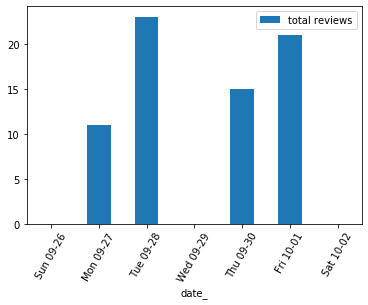

In [59]:
import datetime



today = pd.to_datetime("today").round('1d')
week_range = pd.date_range(today-pd.Timedelta(days=6),today,freq='d')
date2count ={"date":week_range,"total reviews":[0]*7,"date_":[x.strftime('%a %m-%d') for x in week_range]}
for card_stamp in cards_frame["last_reviewed_stamp"]:
    for day_of_week in week_range:
        if day_of_week < card_stamp < day_of_week+pd.Timedelta(days=1):
            date2count["total reviews"][list(week_range).index(day_of_week)] += 1
            break
            

            
            

datesframe = pd.DataFrame(date2count)


datesframe.plot.bar(x='date_', y='total reviews', rot=60)


In [60]:
#clustering

In [61]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# Word vectors
# word_model = Word2Vec.load('wv_word')
# char_model = Word2Vec.load('wv_char')
# pos_model = Word2Vec.load('wv_char_position')

# Facebook's Chinese word vectors.
fb_model = KeyedVectors.load_word2vec_format('toastynews.vec')
vector = fb_model['一']


In [62]:
from nltk.cluster import KMeansClusterer
import nltk
items = []
for word in cards_frame.traditional:
    word = word.strip("?")
    try:
        fb_model[items + [word]]
    except:
        print(word)
        continue
    items.append(word)


X = fb_model[items]
NUM_CLUSTERS=55
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)




入嚟
拍烏蠅
十問九唔應
一天都光晒
得唔得
氹返
打過嚟
雞髀
磨豆腐
落狗屎
瀨嘢
等一陣
啱啱
下次見
眼耳口鼻
郁咗一郁
唔理
好冇
唔怪得
早唞
早啲
呢幾日
新冠狀病毒
放飛機
一條褲
唔該嗮
收銀台
厾
落嚟
方便麵
冇耐
步步高陞
鹹濕
嘈喧巴閉
睇見
好耐冇見
過嚟
嗰度
唱Ｋ
返屋企
晏晝飯
睇吓
冇可能
定係
一啲啲
奇幻片
唔記得
袜
等一下
毛鬙鬙
游水池
蘿卜
水上公園
絝
幾大码
煮餸
碌柚
平板電腦
戏
睇書
刘建华
出便
邊个
韩剧
睇電視
台剧
噚日
蕹菜
唔駛客氣
椰菜花
馬騮仔
飲醉酒
了哥
猪仔
落课
踩单车
我嘅
多謝嗮
打篮球
頸喝
幾多錢
只係
朱咕叻
梅青恬
邊啲
嗰啲
車釐子
啡色
唔識
好睇
冇所謂
癡線


In [63]:
vocab_lists = {}
longest_length = 0
for i,item in enumerate(items):
    cluster = str(assigned_clusters[i])
    if cluster not in vocab_lists:
        vocab_lists[cluster] = [item]
    else:
        vocab_lists[cluster].append(item)
        if len(vocab_lists[cluster]) > longest_length:
            longest_length = len(vocab_lists[cluster])
for list_ in vocab_lists:
    vocab_lists[list_] += [""]*(longest_length - len(vocab_lists[list_]))
transposed = []
for row_n in range(0,longest_length):
    row = {}
    for listname in vocab_lists.keys():
        row[listname] = vocab_lists[listname][row_n]
    transposed.append(row)
with open("cluster_lists.csv", "w") as f:
    writer = csv.DictWriter(f, fieldnames=vocab_lists.keys())
    writer.writeheader()
    for row in transposed:
        writer.writerow(row)









for i,item in enumerate(items):
    if assigned_clusters[i] == 1:
        print(item)

投訴
醫院
發現
指示
按照
檢查
詳細
顯示
展示
發燒
